In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from walker import Walker, hills_context_map_builder, SquareNextStepBuilder, plot_trajectory

# 1. Take a look at the following code
we can imagine a scenario where we want to try a walker that uses a square steppung proposal rather than a Gaussian one. The code to generate it looks like this:

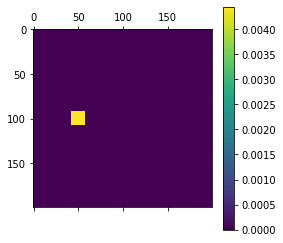

In [3]:
def square_probability(current_i, current_j, width, size):
    grid_ii, grid_jj = np.mgrid[0:size, 0:size]
    inside_mask = (np.abs(grid_ii - current_i) <= width // 2) & (np.abs(grid_jj - current_j) <= width // 2)
    p_next_step = inside_mask / inside_mask.sum()
    return p_next_step

p = square_probability(100, 50, 14, 200)
plt.matshow(p)
plt.colorbar()

# 2. Break out the 'next_step_proposal' function
The current two next step proposal functions (Gaussian and Square) use different parameters. Luckily those parameters don't change over the iterations. For generating the 'next_step_proposal' both just need the current i, j coordinates.

In [ ]:
# remove
# here,, do we want them to figure out by themselves that they have to write a function? Or give a bit of help?

In [6]:
# remove?
next_step_builder = SquareNextStepBuilder(size=200, width=5)

In [7]:
# remove?
walker = Walker.from_context_map_builder(
    size=200,
    context_map_builder=hills_context_map_builder,
    next_step_builder=next_step_builder,
)

# 3. Simulate a trajectory with the new proposal method

In [10]:
i, j = 100, 50
trajectory = []
for _ in range(1000):
    i, j = walker.sample_next_step(i, j)
    trajectory.append((i, j))

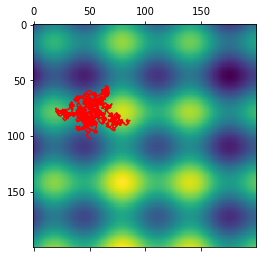

In [11]:
plot_trajectory(trajectory, walker.context_map)
